<a href="https://colab.research.google.com/github/szyxxx/MachineLearning-TelkomUniversity/blob/main/AxelDavid_1103210017_TK4504_Clustering_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Axel David<br>
1103210017<br>
Clustering<br>


# Import Library

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Import Dataset

In [2]:
! chmod 600 /content/kaggle_conf/kaggle.json

In [6]:
! KAGGLE_CONFIG_DIR=/content/kaggle_conf/ kaggle datasets download -d shwetabh123/mall-customers

  0% 0.00/1.56k [00:00<?, ?B/s]
100% 1.56k/1.56k [00:00<00:00, 4.20MB/s]


In [9]:
zip_file = zipfile.ZipFile('/content/dataset/mall-customers.zip','r')
zip_file.extractall('/content/dataset/')

# Informasi Dataset

In [22]:
df = pd.read_csv("/content/dataset/Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [24]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Cleaning

In [25]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [26]:
df = pd.get_dummies(df, columns=['Gender'])

In [28]:
df.dtypes

CustomerID                int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender_Female              bool
Gender_Male                bool
dtype: object

# Feature Selection

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

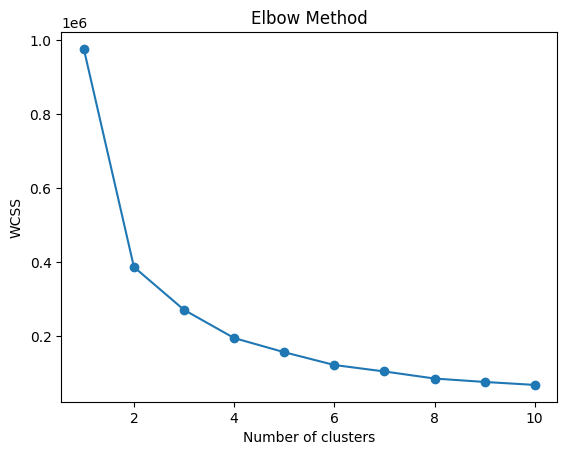

In [29]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Train Model

In [30]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(df)

df['Cluster'] = kmeans.labels_

print("Hasil Clustering:")
df

Hasil Clustering:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,1,19,15,39,False,True,5
1,2,21,15,81,False,True,1
2,3,20,16,6,True,False,5
3,4,23,16,77,True,False,1
4,5,31,17,40,True,False,5
...,...,...,...,...,...,...,...
195,196,35,120,79,True,False,4
196,197,45,126,28,True,False,0
197,198,32,126,74,False,True,4
198,199,32,137,18,False,True,0


# Data Evaluation

In [31]:
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

db_index = davies_bouldin_score(df, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

inertia_score = kmeans.inertia_
print(f"Inertia Score: {inertia_score}")

Silhouette Score: 0.40999958710045903
Davies-Bouldin Index: 0.7921732639852306
Inertia Score: 122674.04592068735


# Visualization Data

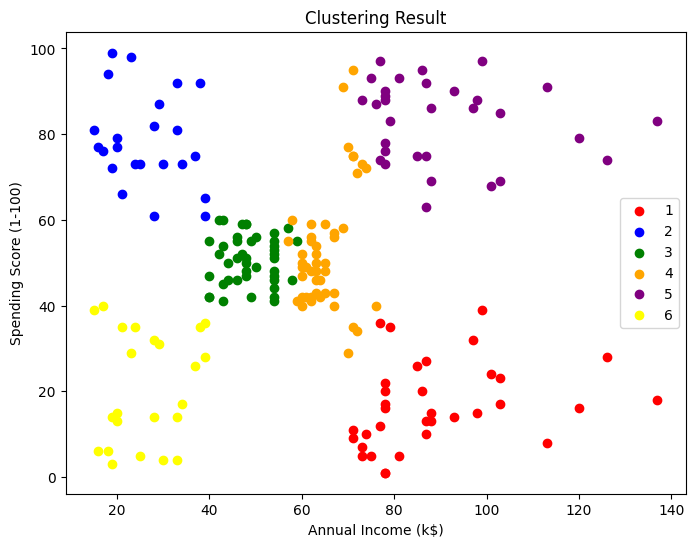

In [32]:
plt.figure(figsize=(8, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

for cluster_num in range(6):
    cluster_data = df[df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], color=colors[cluster_num], label=f'{cluster_num + 1}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Result')

plt.legend()

plt.show()

# Prediction (Additional)
Dalam dataset tersebut kita dapat melakukan test dan train juga untuk membuat sebuah prediksi. Dari dataset tersebut, kita dapat membuat sebuah prediksi seperti : <br>
<li>Prediksi Pengeluaran (Spending Score)
<li>Prediksi Pendapatan Tahunan (Annual Income)
<li>Segmentasi Pelanggan (Customer Segmentation)
<li>Prediksi Usia Pelanggan (Customer Age Prediction)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

<h3><li>Prediksi Pengeluaran (Spending Score)</h3>

In [43]:
label_encoder = LabelEncoder()
df['Gender'] = df['Gender_Male'].astype(int) # Ubah boolean menjadi integer (0 untuk Female, 1 untuk Male)
df['Gender'] = label_encoder.fit_transform(df['Gender'])

X = df.drop(['CustomerID', 'Spending Score (1-100)'], axis=1)
y = df['Spending Score (1-100)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 407.68822639971324
R-squared: 0.1734485718925609


<h3><li>Prediksi Pendapatan Tahunan (Annual Income)</h3>

In [44]:
X = df.drop(['CustomerID', 'Annual Income (k$)'], axis=1)
y = df['Annual Income (k$)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 426.5553958816399
R-squared: 0.049319700777099906


<h3><li>Segmentasi Pelanggan (Customer Segmentation)</h3>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

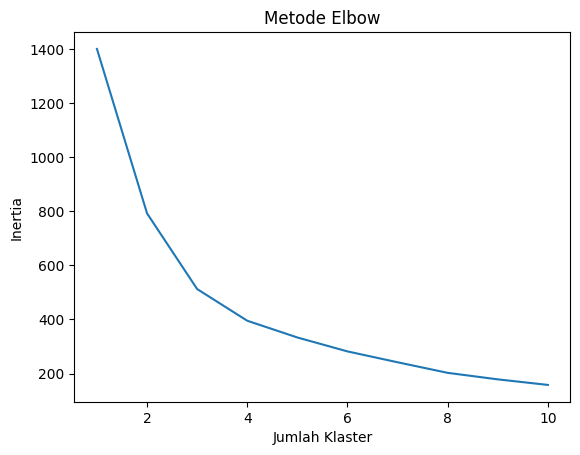

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hasil Segmentasi Pelanggan:

Klaster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   57.000000  57.000000           57.000000               57.000000   
mean   100.210526  28.438596           59.666667               67.684211   
std     60.308652   5.493560           26.463812               18.712255   
min      4.000000  18.000000           16.000000               29.000000   
25%     46.000000  23.000000           39.000000               51.000000   
50%    106.000000  30.000000           62.000000               73.000000   
75%    154.000000  32.000000           78.000000               83.000000   
max    196.000000  40.000000          120.000000               99.000000   

       Cluster  Gender  
count     57.0    57.0  
mean       0.0     0.0  
std        0.0     0.0  
min        0.0     0.0  
25%        0.0     0.0  
50%        0.0     0.0  
75%        0.0     0.0  
max        0.0     0.0  

Klaster 1:
       CustomerID        Age  Annual I

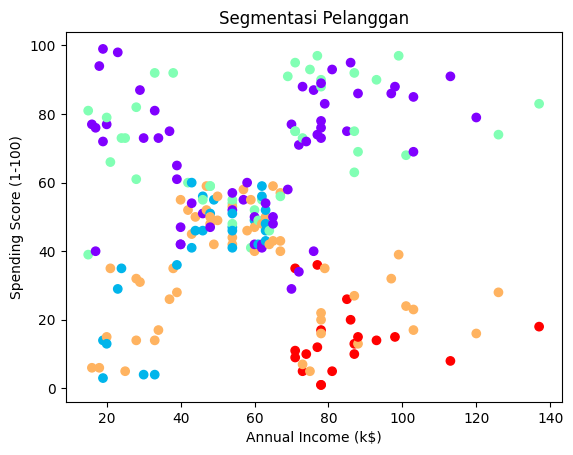

In [46]:
X = df.drop(['CustomerID'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.show()

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

print("Hasil Segmentasi Pelanggan:")
for cluster in range(n_clusters):
    print(f"\nKlaster {cluster}:")
    print(df[df['Cluster'] == cluster].describe())

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Segmentasi Pelanggan')
plt.show()

<h3><li>Usia Pelanggan (Customer Age Prediction)</h3>

In [47]:
X = df.drop(['CustomerID', 'Age'], axis=1)
y = df['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 170.71488233918615
R-squared: 0.1772380242942495
